In [2]:
!pip install dask
!pip install dask-ml
import dask.dataframe as dd
# import dask
# import dask.dataframE



# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'exploring-open-source-java-technical-debt:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F2889653%2F4982349%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240317%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240317T192727Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D669b07b13490dff11bc767a2e571cf321b4f94660f973aafb9e31c0bb3c8a1c38819c8d78b223e03f348e56e382b35c6fd3ddb6b63c74721934640dbc392ef4251a4c778c648baf54b67b8b26102c5370770da6fe153243539f7632c8f80caccb139b3997709d4eca47fec7c41c34b7d1adbcc7b5316f7abb00cd16ce81194ab437caf9fd8bf287b96c443a7cc770a18dfd0536af5c8cb61f76dde80b3fe2fa3a02caacbe0c435f63cc720b38b6036375316594f5dc14a236f5797d9d98a5b6319cfb987a3d51ab93b45ca4a1a826d86fcc691cdd35284f16778f5862161b293f7126213db1c47d872e71888cb1ba1611f95e3de94aaff9ab2f679c2f23cee25,dask-ml:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F2896280%2F4993614%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240317%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240317T192727Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D9f272e1ab2fe2a31d05ee6d05d165c27e8ee8de4451e7f4fe72dd186941eb5e9ab737a7e3d6cf331bd15631f1053e36f0adb95ced35774bfca087fefc8ef993e805490057c160cb3fd33f5b36a32077a9e08b4842a5a4e4405e65c2ff453012810b20814deea1e823fa4abdd427d4639bfa61956128b51af00f6d4bd183f1a418d9ecbdeb1c4848a5f0412c4e4011276b6a32a3d8071082a4553f6858ad441eca45348bee7acaeef5fb26fb7d632d4ec3299e20448b8db434465841a1e247f3da8f005bc58cbe3165e45f2be24a56fe9ab7a5f3996ad5a1f65149c33056ea5157229de631d41c82557fe7b930d75f21cc87c036e3aaf8fe85cee52e861150720'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


file_path = '/kaggle/input/exploring-open-source-java-technical-debt/TD_of_55M_files.csv'
df = dd.read_csv(file_path)

[==================================================] 1639103449 bytes downloaded
Downloaded and uncompressed: exploring-open-source-java-technical-debt
[==================================================] 156297 bytes downloaded
Downloaded and uncompressed: dask-ml
Data source import complete.


In [3]:
df

,file_md5,td_probability,fanin,fanout,total_methods,total_variables,total_lines,comment_lines,occurences
npartitions=60,,,,,,,,,
,object,float64,float64,float64,float64,float64,float64,float64,int64
,...,...,...,...,...,...,...,...,...
...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...


In [4]:
len(df)

56293199

In [5]:
df.head()

,file_md5,td_probability,fanin,fanout,total_methods,total_variables,total_lines,comment_lines,occurences
0,00000028e3b17d93b2b5235e3d18d149,0.00,0.0,1.0,1.0,1.0,17.0,0.0,2
1,00000031f092e1fbc4c58488fc309bd2,0.32,1.0,16.0,28.0,29.0,258.0,12.0,1
2,000000512c34c6361eb9e5f4b8d56d55,0.00,1.0,1.0,12.0,7.0,120.0,23.0,11
3,0000009931c19274d2ef5e946156b7ca,0.01,0.0,6.0,4.0,18.0,190.0,85.0,7
4,000000bfb79176f7122fafab5429a653,0.00,0.0,6.0,2.0,6.0,48.0,4.0,5


In [6]:
# Check for missing values
df.isnull().sum()


Dask Series Structure:
npartitions=1
comment_lines      int64
total_variables      ...
dtype: int64
Dask Name: dataframe-sum-agg, 4 graph layers

In [7]:
# Assuming 'occurrences' is a categorical variable
df['occurences'] = df['occurences'].astype('category')

In [8]:
df = df.drop(columns=['file_md5'])

In [9]:
import dask.dataframe as dd
from dask_ml.preprocessing import MinMaxScaler


# Scaling Numeric Features with Dask
scaler = MinMaxScaler()
numeric_cols = ['fanin', 'fanout', 'total_methods', 'total_variables', 'total_lines', 'comment_lines']

# Fit the scaler on the entire dataframe to calculate scaling parameters
scaler.fit(df[numeric_cols])

# Use map_partitions to apply scaling to each partition
def scale_partition(partition):
    return scaler.transform(partition)

df[numeric_cols] = df[numeric_cols].map_partitions(scale_partition)

# Ensure the selected columns are of numeric type
for col in numeric_cols:
    df[col] = df[col].astype('float64')

# Compute the pairwise correlation using the 'pearson' method
correlation_matrix = df[numeric_cols].corr()

# Display the correlation matrix
print(correlation_matrix.compute())


                    fanin    fanout  total_methods  total_variables  \
fanin            1.000000  0.217072       0.203903         0.156126   
fanout           0.217072  1.000000       0.484007         0.401817   
total_methods    0.203903  0.484007       1.000000         0.497737   
total_variables  0.156126  0.401817       0.497737         1.000000   
total_lines      0.191642  0.353680       0.536200         0.653295   
comment_lines    0.104023  0.295239       0.455491         0.361599   

                 total_lines  comment_lines  
fanin               0.191642       0.104023  
fanout              0.353680       0.295239  
total_methods       0.536200       0.455491  
total_variables     0.653295       0.361599  
total_lines         1.000000       0.529397  
comment_lines       0.529397       1.000000  


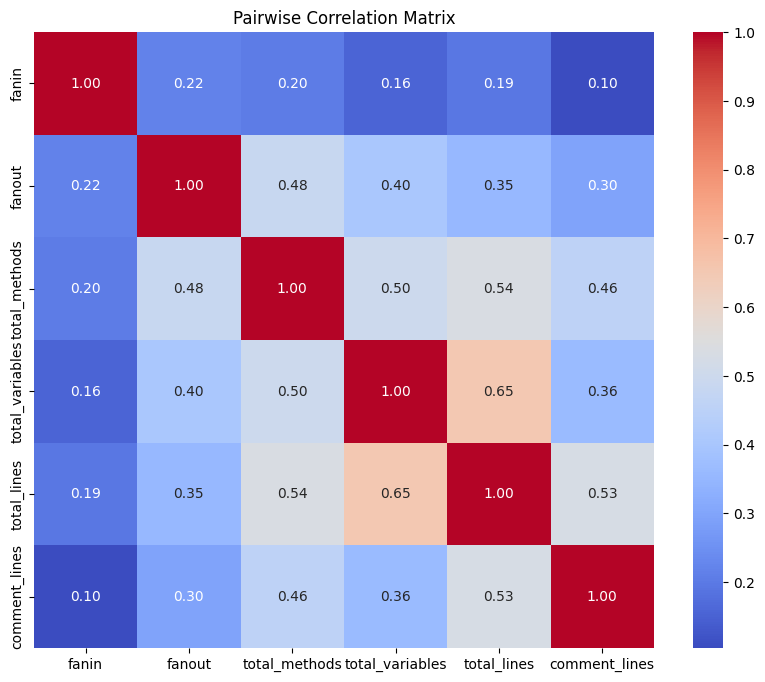

In [10]:
import dask.dataframe as dd
import seaborn as sns
import matplotlib.pyplot as plt

# Select numeric columns for correlation
numeric_cols = ['fanin', 'fanout', 'total_methods', 'total_variables', 'total_lines', 'comment_lines']

# Ensure the selected columns are of numeric type
for col in numeric_cols:
    df[col] = df[col].map_partitions(lambda x: x.astype('float'))

# Compute the pairwise correlation using the 'pearson' method
correlation_matrix = df[numeric_cols].corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix.compute(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Pairwise Correlation Matrix')
plt.show()

In [12]:
import dask.dataframe as dd
from dask_ml.model_selection import train_test_split


# Load the first 26 million rows of your dataset into a Dask DataFrame
df = df.head(26000000)

# Convert to Dask DataFrame
ddf = dd.from_pandas(df, npartitions=1)  # Assuming your DataFrame is in pandas format

# Repartition the Dask DataFrame into a larger number of partitions
ddf = ddf.repartition(npartitions=100)  # Adjust the number of partitions as needed

# Split dataset into features and target
X = ddf.drop(columns=['td_probability'])
y = ddf['td_probability']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

/usr/local/lib/python3.10/dist-packages/dask/dataframe/core.py:8110: UserWarning: Insufficient elements for `head`. 26000000 elements requested, only 938198 elements available. Try passing larger `npartitions` to `head`.
  warnings.warn(


In [16]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt


# Initialize Gradient Boosting Regressor
gb_regressor = GradientBoostingRegressor()

# Train the model
gb_regressor.fit(X_train, y_train)

# Predict using the trained model
predictions_gb = gb_regressor.predict(X_test)

# Calculate metrics (MSE, RMSE, R2 score) for evaluation
mse = mean_squared_error(y_test, predictions_gb)
rmse = sqrt(mse)
r2 = r2_score(y_test, predictions_gb)

print('Gradient Boosting Regressor:')
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2) Score:", r2)






Gradient Boosting Regressor:
Mean Squared Error (MSE): 0.007900356722198121
Root Mean Squared Error (RMSE): 0.08888395086964869
R-squared (R2) Score: 0.9003206506512884


In [17]:
import joblib

# Specify the file path where you want to save the model
model_file_path = 'gb_regressor_model.pkl'

# Save the trained model
joblib.dump(gb_regressor, model_file_path)

print("Model saved successfully to:", model_file_path)


Model saved successfully to: gb_regressor_model.pkl


In [18]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt


# Initialize Gradient Boosting Regressor
rb_regressor = RandomForestRegressor()

# Train the model
rb_regressor.fit(X_train, y_train)

# Predict using the trained model
predictions_rf = rb_regressor.predict(X_test)

# Calculate metrics (MSE, RMSE, R2 score) for evaluation
mse = mean_squared_error(y_test, predictions_rf)
rmse = sqrt(mse)
r2 = r2_score(y_test, predictions_rf)

print('Random Forest Regressor:')
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2) Score:", r2)




Random Forest Regressor:
Mean Squared Error (MSE): 0.006093637004509787
Root Mean Squared Error (RMSE): 0.0780617512262554
R-squared (R2) Score: 0.9231161587843127


In [19]:
import joblib

# Specify the file path where you want to save the model
model_file_path = 'rb_regressor_model.pkl'

# Save the trained model
joblib.dump(rb_regressor, model_file_path)

print("Model saved successfully to:", model_file_path)


Model saved successfully to: rb_regressor_model.pkl


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


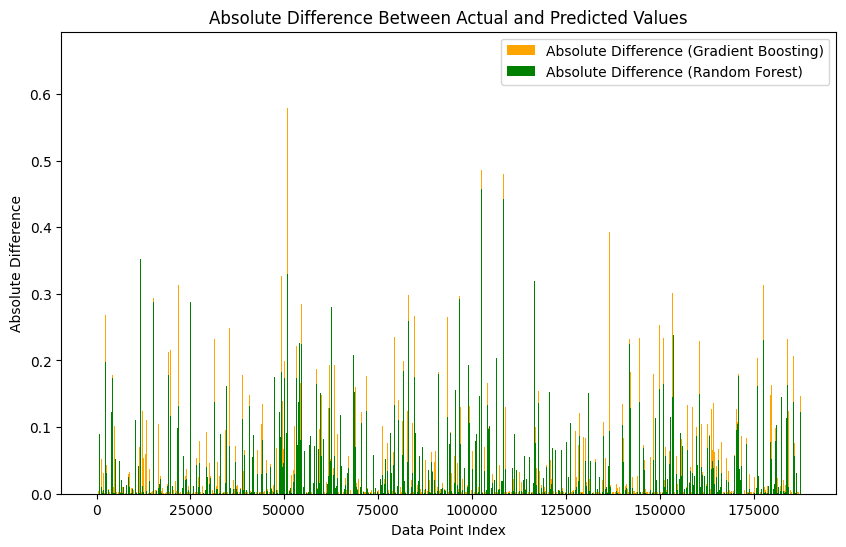

In [31]:
from dask.array import asarray
import matplotlib.pyplot as plt

# Assuming y_test, predictions_gb, and predictions_rf are Dask arrays, convert them to NumPy arrays
y_test = asarray(y_test)
predictions_gb = asarray(predictions_gb)
predictions_rf = asarray(predictions_rf)

# Calculate the absolute differences between actual and predicted values for both models
diff_gb = abs(y_test - predictions_gb)
diff_rf = abs(y_test - predictions_rf)

# Plot the absolute differences as a bar plot
plt.figure(figsize=(10, 6))

# Plot the absolute differences for Gradient Boosting Regressor
plt.bar(range(len(diff_gb)), diff_gb, color='orange', label='Absolute Difference (Gradient Boosting)')

# Plot the absolute differences for Random Forest Regressor
plt.bar(range(len(diff_rf)), diff_rf, color='green', label='Absolute Difference (Random Forest)')

plt.xlabel('Data Point Index')
plt.ylabel('Absolute Difference')
plt.title('Absolute Difference Between Actual and Predicted Values')
plt.legend()

plt.show()









